# Librerías y configuración

In [40]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Lectura de datos 

In [31]:
df = pd.read_excel('AllMetrics.xlsx')
df.head()

,Unnamed: 0,Scopus author ID,Most recent publication,Citations,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),CiteScore,SNIP,h-index Ponderado
0,0,10038895100,2017,36,36.0,2.13,1,12.0,2017,7.4,1.45,1.0
1,1,10039007800,2018,24,24.0,3.10,1,7.0,2018,3.5,1.19,1.0
2,2,10039013100,2020,0,0.0,0.00,0,71.0,2020,2.6,1.00,0.0
3,3,10039034400,2019,25,25.0,3.72,1,5.0,2019,2.7,0.88,1.0
4,4,10039108900,2021,6,6.0,1.63,1,18.0,2021,16.8,2.29,1.0


In [32]:
df.drop(columns='Unnamed: 0',inplace=True)
df.set_index('Scopus author ID',inplace=True)
df.head()

,Most recent publication,Citations,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),CiteScore,SNIP,h-index Ponderado
Scopus author ID,,,,,,,,,,
10038895100,2017,36,36.0,2.13,1,12.0,2017,7.4,1.45,1.0
10039007800,2018,24,24.0,3.10,1,7.0,2018,3.5,1.19,1.0
10039013100,2020,0,0.0,0.00,0,71.0,2020,2.6,1.00,0.0
10039034400,2019,25,25.0,3.72,1,5.0,2019,2.7,0.88,1.0
10039108900,2021,6,6.0,1.63,1,18.0,2021,16.8,2.29,1.0


# Entendimiento de los datos

Revisar multicolinealidad entre variables

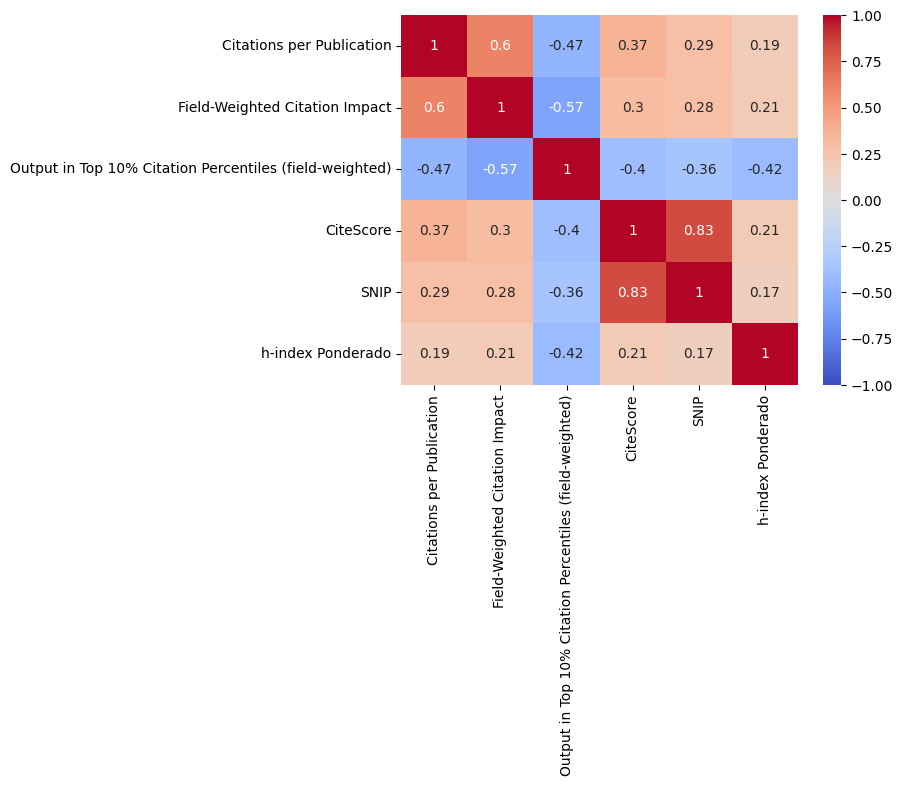

In [33]:
cols = ['Citations per Publication','Field-Weighted Citation Impact',
        'Output in Top 10% Citation Percentiles (field-weighted)',
        'CiteScore','SNIP','h-index Ponderado']
sns.heatmap(df[cols].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

Por la correlación entre SNIP y CiteScore, se quitará una de las columnas para el análisis. También se elimina el h-index ponderado porque se calcula con el h-index que es el target

In [34]:
df1 = df.drop(columns=['CiteScore','h-index Ponderado'])

# Target h-index

## Partición de base de datos

In [35]:
target = ['h-index']
X = df1.drop(columns=target)
Y = df1[target]

## Regresión lineal Ordinary Least Squares (OLS)

In [39]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(Y, Xc) #Ordinary Least Squares
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                h-index   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 5.502e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:            -1.6573e+05
No. Observations:              136109   AIC:                         3.315e+05
Df Residuals:                  136101   BIC:                         3.316e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

El R² ajustado es medianamente bueno, pero el Jarque-Bera es demasiado alto, lo que indica que la distribución de los errores no es normal.

## Regresión lineal con sklearn

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=0)

model = LinearRegression()
model.fit(X_train,Y_train)
print('Intercept',model.intercept_[0])
for i in range(len(X_train.columns)):
    print(X_train.columns[i],model.coef_[0][i])

Intercept 232.03543833048323
Most recent publication 0.47987143369110885
Citations 0.014358644492353391
Citations per Publication -0.022352520972993492
Field-Weighted Citation Impact -0.015005961750654384
Output in Top 10% Citation Percentiles (field-weighted) -0.016499764957493872
Oldest publication (since 1996) -0.5939672576201743
SNIP 0.02398031763769232


In [77]:
predictions = model.predict(X_test)

print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,Y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,Y_test)))
print('MAE',mean_absolute_error(Y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(Y_test, predictions))  #mean squared error


Puntaje entrenamiento: 0.7746133530804657

Puntaje Test: 0.5853119658228102

MAE 0.49591855324448153
MSE 1.1346388091062436


El modelo se ajusta moderadamente para el conjunto de entrenamiento, pero no para el de prueba, puede que haya overfitting

## Regresión polinomial OLS

In [81]:
polynomial_features= PolynomialFeatures(degree=3)
Xp = polynomial_features.fit_transform(X)
Xpc = sm.add_constant(Xp) #para obtener la ordenada en el origen
model = sm.OLS(Y, Xpc) #Ordinary Least Squares
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                h-index   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:48:39   Log-Likelihood:                -89306.
No. Observations:              136109   AIC:                         1.788e+05
Df Residuals:                  135999   BIC:                         1.799e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.003    -12.838      0.0

## Regresión polinomial con sklearn

In [87]:
Xp_train,Xp_test,Yp_train,Yp_test = train_test_split(Xp,Y,test_size=.30,random_state=0)

model = LinearRegression()  
model.fit(Xp_train,Yp_train)  
predictions = model.predict(Xp_test)
print('Puntaje entrenamiento: {}\n'.format(model.score(Xp_train,Yp_train)))
print('Puntaje Test: {}\n'.format(model.score(Xp_test,Yp_test)))
print('MAE',mean_absolute_error(Yp_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(Yp_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.9172437577242047

Puntaje Test: -57.880164133897736

MAE 0.3943706427651803
MSE 161.103561730262


## Regresión con kNN

In [93]:
scaler = StandardScaler()
transformed_X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(transformed_X,Y,test_size=.30,random_state=0)

model = KNeighborsRegressor(5,metric='euclidean')  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)

print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.9596444494551726

Puntaje Test: 0.9252853291889218

MAE 0.17683736193764849
MSE 0.20442877084710892


## Regresión con Árbol de decisión

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0)

model = DecisionTreeRegressor(max_depth=3)  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)

print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.7199930682880363

Puntaje Test: 0.6831586591987986

MAE 0.47721921293878394
MSE 0.8669179044811592


## Regresión con Random Forest

In [99]:
model = RandomForestRegressor(max_depth=10,max_leaf_nodes=50,random_state=0)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print('MAE:',mean_absolute_error(y_test, predictions))
print('train score',model.score(X_train,y_train))
print('test score',model.score(X_test,y_test))

/tmp/ipykernel_14200/3934460837.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


MAE: 0.1579790241216545
train score 0.9479475797998975
test score 0.9305616614952619
